In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

C:\Users\MJ\AppData\Local\Temp\ipykernel_23588\3071743762.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


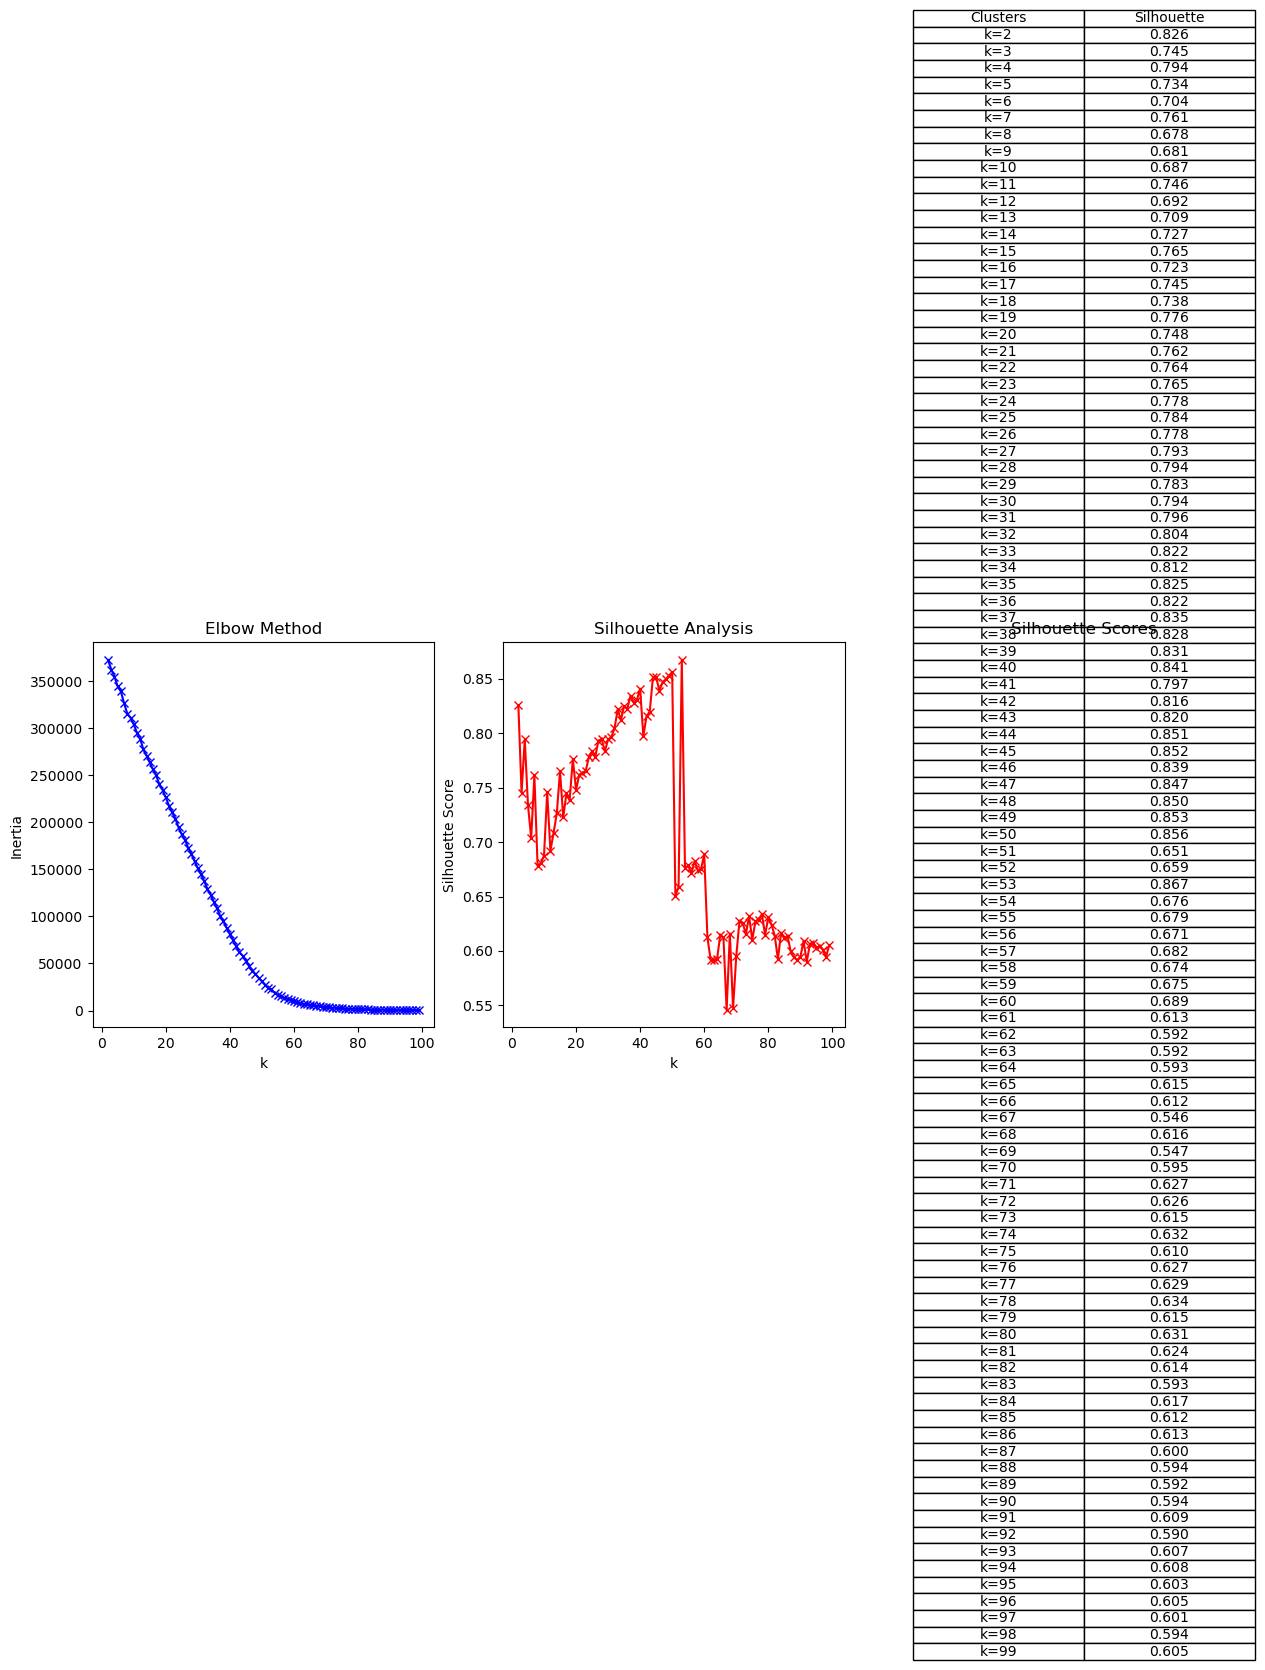


Detailed Results:
k=2:
  Inertia: 372531
  Silhouette Score: 0.826
k=3:
  Inertia: 362421
  Silhouette Score: 0.745
k=4:
  Inertia: 354813
  Silhouette Score: 0.794
k=5:
  Inertia: 344434
  Silhouette Score: 0.734
k=6:
  Inertia: 339087
  Silhouette Score: 0.704
k=7:
  Inertia: 326488
  Silhouette Score: 0.761
k=8:
  Inertia: 315522
  Silhouette Score: 0.678
k=9:
  Inertia: 311401
  Silhouette Score: 0.681
k=10:
  Inertia: 304116
  Silhouette Score: 0.687
k=11:
  Inertia: 295329
  Silhouette Score: 0.746
k=12:
  Inertia: 289017
  Silhouette Score: 0.692
k=13:
  Inertia: 277483
  Silhouette Score: 0.709
k=14:
  Inertia: 271009
  Silhouette Score: 0.727
k=15:
  Inertia: 263810
  Silhouette Score: 0.765
k=16:
  Inertia: 256272
  Silhouette Score: 0.723
k=17:
  Inertia: 249941
  Silhouette Score: 0.745
k=18:
  Inertia: 240377
  Silhouette Score: 0.738
k=19:
  Inertia: 234317
  Silhouette Score: 0.776
k=20:
  Inertia: 226455
  Silhouette Score: 0.748
k=21:
  Inertia: 217792
  Silhouette Sc

In [8]:
# Read and scale the cleaned data
df = pd.read_csv('../data/5_spotify_numerical_cleaned.csv')

# Initialize and fit the scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Save scaled data
df_scaled.to_csv('../data/6_spotify_scaled_cleaned.csv', index=False)

# Perform clustering analysis
k_range = range(2, 100)
inertias = []
silhouette_scores = []

# Calculate inertia and silhouette score for each k
for k in k_range:
    # Train KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    
    # Store metrics
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Create visualization
plt.figure(figsize=(15, 5))

# Elbow plot
plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette score plot
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

# Print scores in a table
plt.subplot(1, 3, 3)
plt.axis('off')
cell_text = [[f"k={k}", f"{score:.3f}"] for k, score in zip(k_range, silhouette_scores)]
plt.table(cellText=cell_text, 
         colLabels=['Clusters', 'Silhouette'],
         loc='center',
         cellLoc='center')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("================")
for k, inertia, silhouette in zip(k_range, inertias, silhouette_scores):
    print(f"k={k}:")
    print(f"  Inertia: {inertia:.0f}")
    print(f"  Silhouette Score: {silhouette:.3f}")

In [ ]:
**Make sure notebooks have:**

* A quick description at the top of what is going to be done
* Headers with numbers on every section
* Describe any decision made in a sentence
* Make sure to run the cells and save the notebook with the output. outputs should be readable, not to long and make sure no errors are shown.